## Import libraries

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

## Load the dataset and reconnaissance

In [2]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/iris.csv')
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


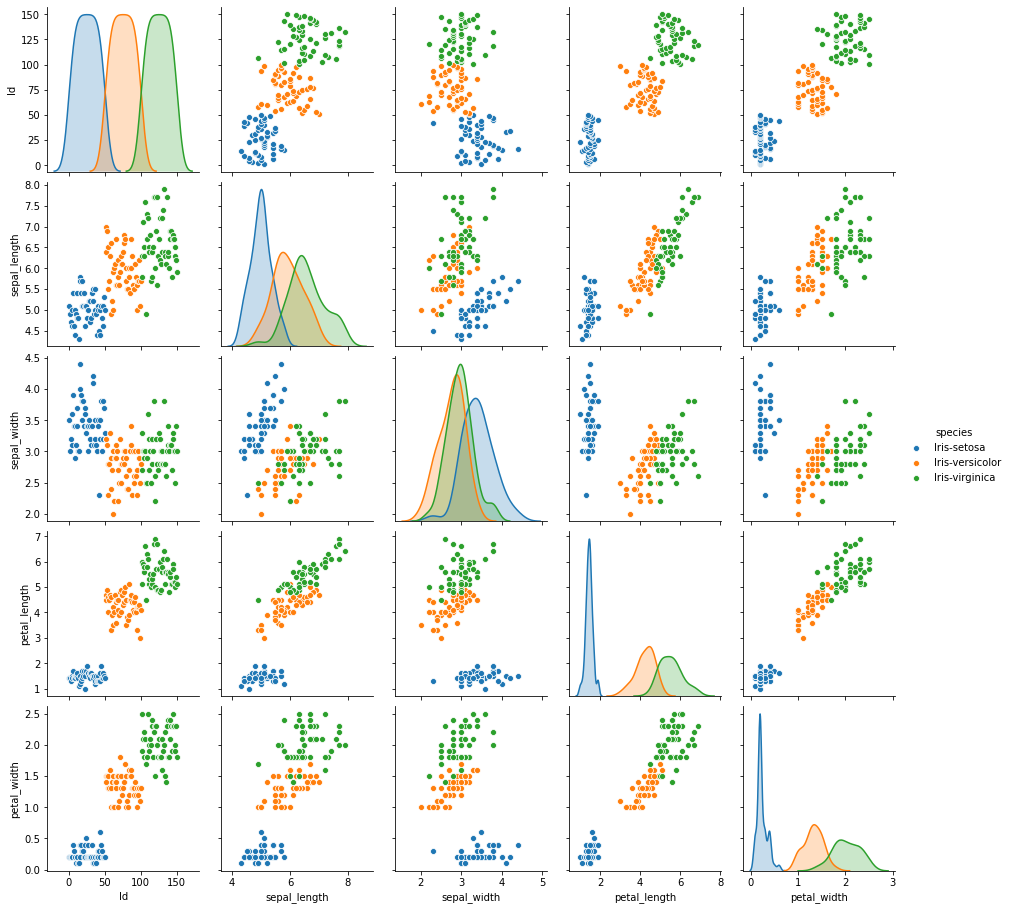

In [8]:
sns.pairplot(df, hue = 'species')
plt.show()

In [11]:
df.columns

Index(['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## Split into explanatory and response variable

In [12]:
X = pd.DataFrame(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = df['species']

## Train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Feature Scaling

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model build up

In [21]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)

## Prediction

In [22]:
y_pred = lr.predict(X_test)

## Model evaluation

In [47]:
dff = pd.DataFrame(np.c_[y_test, y_pred], columns = ['actual','predicted'])
dff

,actual,predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [27]:
lr1 = LogisticRegression()
cross_val_score(lr1, X, y, cv = 10, n_jobs = -1, scoring = 'accuracy').mean().round(4)

0.9733

In [36]:
lr.score(X_test, y_test).round(4)

0.9667

In [40]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
con_mat

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

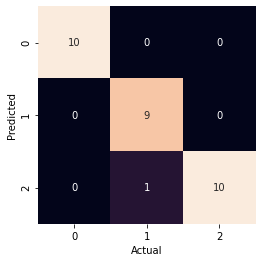

In [41]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [48]:
metrics.accuracy_score(y_test, y_pred).round(5)

0.96667

In [43]:
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

